# MCMC benchmarks

In [1]:
import numpy as np
import torch
import matplotlib.pyplot as plt

## Observations

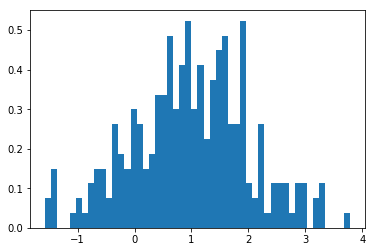

In [2]:
num_observations = 250
theta_true = 1.


N = torch.distributions.normal.Normal(theta_true, 1.)
observations = N.sample(torch.Size([num_observations])).view(-1)

plt.hist(observations.numpy(), bins=50, density=True)
plt.show()

## Metropolis-Hastings

In [3]:
def log_likelihood(theta, observations):
    with torch.no_grad():
        N = torch.distributions.normal.Normal(theta.item(), 1.)
        likelihood = N.log_prob(observations).sum()
        
    return likelihood

In [4]:
from hypothesis.transition import NormalTransitionDistribution
from hypothesis.transition import UniformTransitionDistribution

transition = NormalTransitionDistribution(.1)

min = -5
max = 6
#transition = UniformTransitionDistribution(min, max)

In [5]:
from hypothesis.inference import MetropolisHastings

sampler = MetropolisHastings(log_likelihood, transition)

In [6]:
theta_0 = torch.tensor(5).float()
result_mh = sampler.infer(
    observations,
    theta_0=theta_0,
    samples=10000,
    burnin_steps=1000)

## Hamiltonian Monte Carlo

In [7]:
def log_likelihood(theta, observations):
    N = torch.distributions.normal.Normal(theta, 1.)
    likelihood = N.log_prob(observations).sum()
        
    return likelihood

In [8]:
from hypothesis.inference import HamiltonianMonteCarlo

leapfrog_steps = 50
leapfrog_stepsize = .1
momentum = torch.distributions.normal.Normal(0, 1)
sampler = HamiltonianMonteCarlo(log_likelihood, leapfrog_steps, leapfrog_stepsize)

In [9]:
theta_0 = torch.tensor(5).float()
result_hmc = sampler.infer(
    observations,
    theta_0=theta_0,
    samples=10000,
    burnin_steps=1000)

In [10]:
from hypothesis.visualization.mcmc import plot_trace
from hypothesis.visualization.mcmc import plot_autocorrelation

figure_height = 20
figure_width = 20

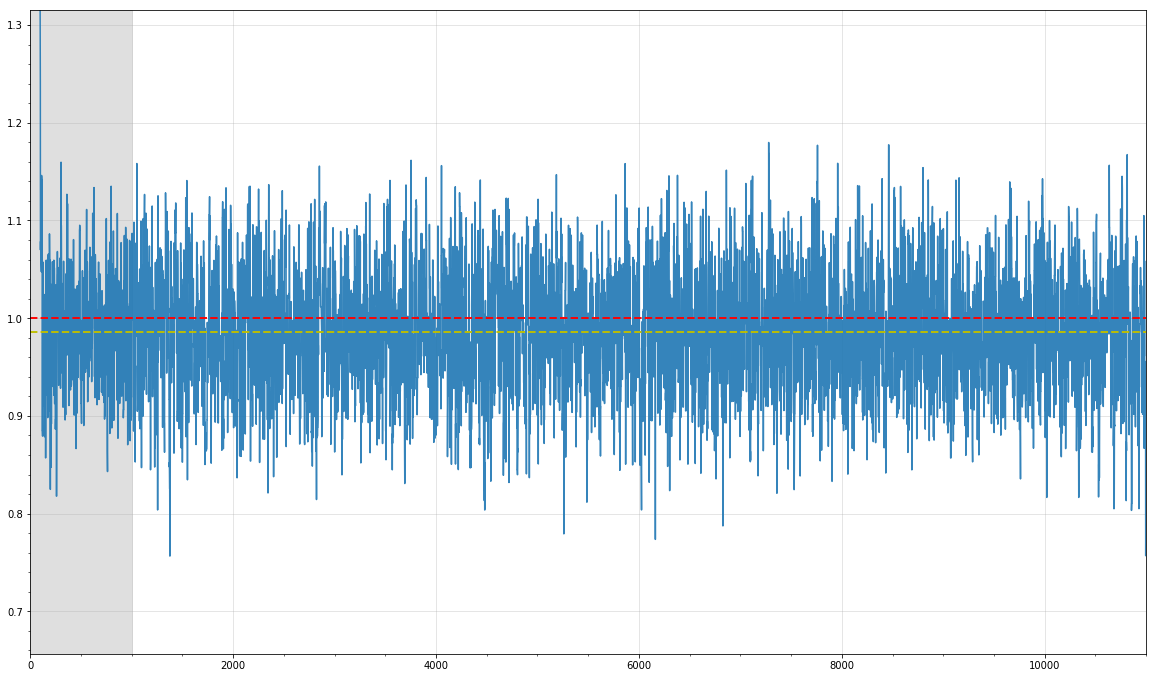

In [16]:
fig, axes = plot_trace(result_mh, truth=theta_true, aspect=.25, show_burnin=True, show_mean=True)
fig.set_figheight(figure_height)
fig.set_figwidth(figure_width)
plt.show()

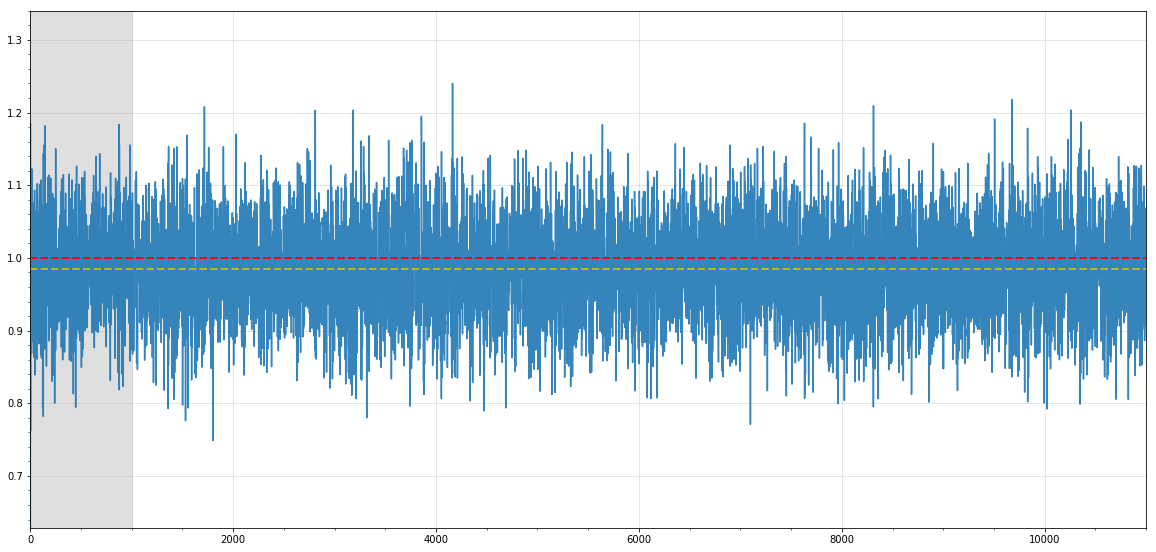

In [12]:
fig, axes = plot_trace(result_hmc, truth=theta_true, aspect=1, show_burnin=True, show_mean=True)
fig.set_figheight(figure_height)
fig.set_figwidth(figure_width)
plt.show()

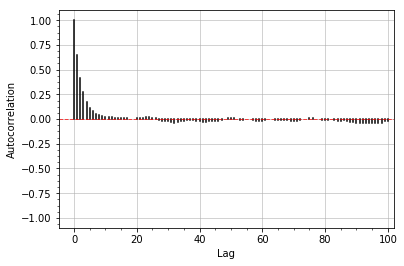

In [17]:
plot_autocorrelation(result_mh, max_lag=100, interval=1)
plt.show()

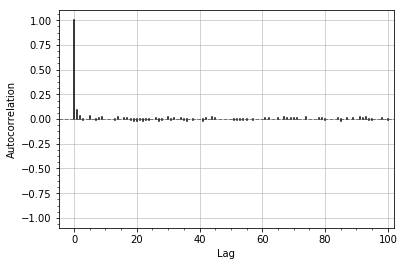

In [18]:
plot_autocorrelation(result_hmc, max_lag=100, interval=1)
plt.show()